In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
dataset = pd.read_csv('50_Startups.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
import pandas as pd

df = pd.DataFrame({
    'value': ['$100', '20%', '$250.50', '35%', '$0', '5.5%']
})

def to_float_percentage(val):
    if isinstance(val, str):
        val = val.strip()
        if val.endswith('%'):
            return float(val[:-1]) 
        elif val.startswith('$'):
            return float(val.replace('$', '').replace(',', '')) * 100  
    return None

df['percentage_float'] = df['value'].apply(to_float_percentage)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   value             6 non-null      object 
 1   percentage_float  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 224.0+ bytes


,value,percentage_float
0,$100,10000.0
1,20%,20.0
2,$250.50,25050.0
3,35%,35.0
4,$0,0.0


In [43]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'Discount Applied': ['$20', '25%', '$15.5', '10%', '$0', '5.5%'],
    'Unit Price': [100, 200, 50, 40, 25, 110]
})

def convert_discount(row):
    discount = row['Discount Applied']
    unit_price = row['Unit Price']

    if isinstance(discount, str):
        discount = discount.strip()
        if '$' in discount:
            value = float(discount.replace('$', ''))
            percent = (value / unit_price) * 100
            return percent
        elif '%' in discount:
            return float(discount.replace('%', ''))
    return 0

df['Discount (%)'] = df.apply(convert_discount, axis=1)

print(df)
df.info()


  Discount Applied  Unit Price  Discount (%)
0              $20         100          20.0
1              25%         200          25.0
2            $15.5          50          31.0
3              10%          40          10.0
4               $0          25           0.0
5             5.5%         110           5.5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Discount Applied  6 non-null      object 
 1   Unit Price        6 non-null      int64  
 2   Discount (%)      6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


In [44]:
# State - char variable (Encoding is required)

# Pre-processing
# part 1 : handling missing value
# part 2 : handling encoding part (label encoder, one hot encoder, dummy)
# part 3 : handling outlier
# part 4 : feature scaling - standarisation and normalisation
# part 5 : handling imbalance dataset

In [45]:
# part 1 : check missing data

In [8]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
# part 2 : Encoding 
# Label encoder
dataset['State'] = dataset['State'].astype('category')
dataset['State'] = dataset['State'].cat.codes

In [10]:
dataset['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [11]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [12]:
# One Hot Encoder
dataset = pd.get_dummies(dataset, columns=['State'])

In [13]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [14]:
# Dummy Variables - n-1

In [15]:
dataset = dataset.drop(['State_0'], axis=1)

In [16]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_1,State_2
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [17]:
x = dataset.drop(['Profit'], axis=1)
y = dataset['Profit']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 5)
(13, 5)
(37,)
(13,)


In [58]:
from sklearn.metrics import r2_score 

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [22]:
y_predict_lr_train = lr_model.predict(x_train)
y_predict_lr_test = lr_model.predict(x_test)

In [61]:
print(r2_score(y_train, y_predict_lr_train))
print("\n")
print(r2_score(y_test, y_predict_lr_test))

0.960389517551679


0.8242696380420218


Blue dots = your original data.

Red line = the model's learned equation. 

coef_ (slope) = 2.0 → For every 1 unit increase in x, y increases by 2. 

intercept_ = 0.0 → The line passes through the origin. 



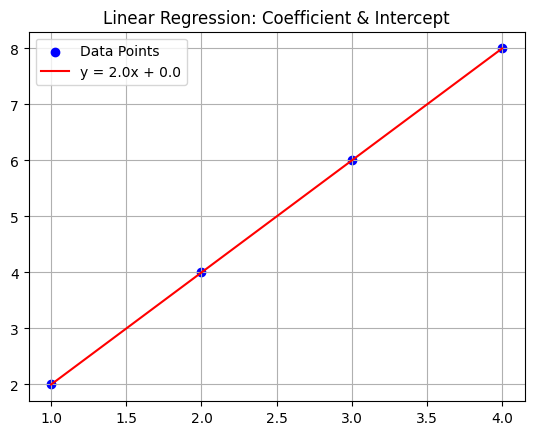

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([[1], [2], [3], [4]])
y = np.array([2, 4, 6, 8])

# Train model
model = LinearRegression()
model.fit(X, y)

# Get values
coef = model.coef_[0]
intercept = model.intercept_

# Plotting
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label=f'y = {coef:.1f}x + {intercept:.1f}')
plt.title("Linear Regression: Coefficient & Intercept")

plt.legend()
plt.grid(True)
plt.show()


In [63]:
lr_model.coef_

array([ 8.15770421e-01,  1.84366878e-02,  2.95195307e-02, -3.11356703e+03,
        1.08176884e+02])

In [64]:
lr_model.intercept_

42612.16966033258

Text(0, 0.5, 'Predicted')

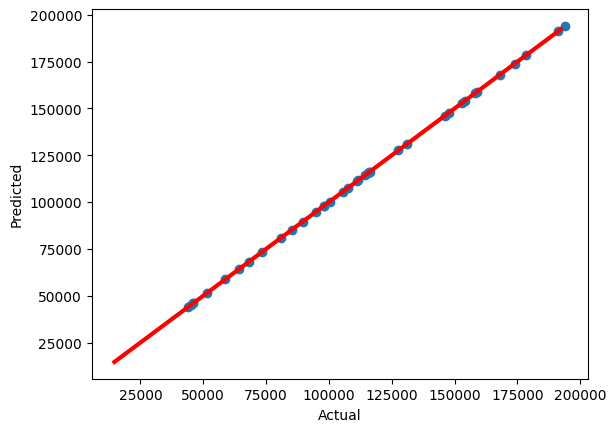

In [65]:
# Lienar Regression
# plt.figure(figsize=(15,10))
plt.scatter(y_predict_lr_train,y_predict_lr_train)
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],c='red',lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Decision Tree Regressor

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [68]:
y_predict_dt_train = dt_model.predict(x_train)
y_predict_dt_test = dt_model.predict(x_test)

In [69]:
print(r2_score(y_train, y_predict_dt_train))
print("\n")
print(r2_score(y_test, y_predict_dt_test))

1.0


0.8542853317028966


# Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
y_predict_rf_train = rf_model.predict(x_train)
y_predict_rf_test = rf_model.predict(x_test)

In [73]:
print(r2_score(y_train, y_predict_rf_train))
print("\n")
print(r2_score(y_test, y_predict_rf_test))

0.9908796945678102


0.850644692201655
